<a href="https://colab.research.google.com/github/Philliec459/Open-Source-Petrophysics/blob/main/Panel_Bvocc_ver3_CoLab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [28]:
using_colab = True

# Gaussian Fit of HPMI data

In [29]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import panel as pn
#pn.extension('matplotlib')
#pn.extension()


pn.extension(comms='colab')

## Compare to HPMI data from M_1 PRT:

HPMI Data from Ed Clerke Spreadsheet that he gives out.

![image.png](attachment:c24b6878-6ecf-4ecf-bce5-7679e6285d9c.png)

In [30]:
Pc = [0.5,0.56,0.63,0.71,0.8,0.9,1.01,1.11,1.24,1.38,1.54,1.72,1.91,2.13,2.38,2.65,2.95,3.29,3.66,4.08,4.55,5.07,5.65,6.29,7.01,7.81,8.71,9.7,10.81,12.04,13.42,14.95,16.66,18.57,20.69,23.05,25.69,28.62,31.89,35.54,39.6,44.12,49.16,54.78,61.04,68.01,75.79,84.45,94.1,104.85,116.83,130.18,145.05,161.63,180.1,200.68,223.61,249.16,277.63,309.35,344.7,384.09,427.98,476.88,531.38,592.1,659.75,735.14,819.15,912.75,1017.05,1133.26,1262.76,1407.05,1567.83,1746.99,1946.61,2169.05,2416.9,2693.07,3000.81,3343.7,3725.78,4151.52,4625.9,5154.5,5743.49,6399.79,7131.08,7945.94,8853.9,9865.62,10992.95,12249.09,13648.77,15208.39,16946.23,18882.64,21040.32,23444.56,26123.53,29108.61,32434.8,36141.06,40270.83,44872.5,50000]
Bvocc= [0,0.002,0.057,0.143,0.243,0.33,0.395,0.434,0.457,0.474,0.498,0.517,0.53,0.56,0.606,0.677,0.719,0.741,0.766,0.8,0.831,0.865,0.914,0.986,1.079,1.199,1.407,1.888,3.003,4.717,6.612,8.191,9.625,10.874,11.927,12.745,13.444,14.04,14.54,14.977,15.363,15.708,16.025,16.325,16.612,16.878,17.127,17.358,17.587,17.808,18.03,18.246,18.461,18.681,18.899,19.115,19.327,19.541,19.77,20.015,20.279,20.547,20.821,21.105,21.414,21.734,22.057,22.394,22.731,23.055,23.365,23.659,23.924,24.182,24.414,24.625,24.808,24.97,25.114,25.245,25.358,25.457,25.547,25.629,25.7,25.757,25.802,25.837,25.854,25.87,25.888,25.901,25.913,25.924,25.936,25.948,25.959,25.974,25.992,26.011,26.029,26.051,26.073,26.101,26.141,26.179,26.229]
Sw = [1,1,0.998,0.995,0.991,0.987,0.985,0.984,0.983,0.982,0.981,0.98,0.98,0.979,0.977,0.974,0.973,0.972,0.971,0.97,0.968,0.967,0.965,0.963,0.959,0.954,0.946,0.928,0.886,0.821,0.749,0.689,0.634,0.587,0.547,0.515,0.489,0.466,0.447,0.431,0.416,0.403,0.391,0.379,0.368,0.358,0.349,0.34,0.331,0.323,0.314,0.306,0.298,0.29,0.281,0.273,0.265,0.257,0.248,0.239,0.229,0.219,0.208,0.198,0.186,0.174,0.161,0.149,0.136,0.123,0.112,0.1,0.09,0.081,0.072,0.064,0.057,0.051,0.045,0.04,0.036,0.032,0.029,0.026,0.023,0.021,0.019,0.018,0.017,0.016,0.016,0.015,0.015,0.014,0.014,0.013,0.013,0.012,0.012,0.011,0.01,0.009,0.009,0.008,0.006,0.005,0.003]
Radii = [212.65,189.86,168.77,149.75,132.9,118.14,105.27,95.79,85.74,77.05,69.04,61.82,55.67,49.92,44.67,40.12,36.04,32.32,29.05,26.06,23.37,20.97,18.82,16.9,15.17,13.61,12.21,10.96,9.84,8.83,7.92,7.11,6.38,5.73,5.14,4.61,4.14,3.71,3.33,2.99,2.68,2.41,2.16,1.94,1.74,1.56,1.4,1.26,1.13,1.01,0.91,0.82,0.73,0.66,0.59,0.53,0.48,0.43,0.38,0.34,0.31,0.28,0.25,0.22,0.2,0.18,0.16,0.14,0.13,0.12,0.1,0.09,0.08,0.08,0.07,0.06,0.05,0.05,0.04,0.04,0.04,0.03,0.03,0.03,0.02,0.02,0.02,0.02,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0,0,0,0,0,0,0,0]
dBVocc = [0,0.002,0.055,0.086,0.1,0.087,0.065,0.039,0.024,0.016,0.024,0.019,0.012,0.03,0.046,0.071,0.043,0.022,0.025,0.034,0.031,0.035,0.049,0.071,0.094,0.12,0.208,0.481,1.115,1.714,1.896,1.579,1.434,1.25,1.052,0.818,0.698,0.596,0.5,0.437,0.386,0.345,0.317,0.3,0.287,0.265,0.249,0.232,0.229,0.221,0.222,0.216,0.214,0.221,0.217,0.216,0.212,0.214,0.228,0.245,0.264,0.268,0.274,0.285,0.308,0.321,0.323,0.338,0.337,0.324,0.309,0.295,0.265,0.258,0.232,0.211,0.183,0.162,0.144,0.131,0.113,0.099,0.09,0.082,0.072,0.057,0.045,0.035,0.018,0.015,0.018,0.013,0.012,0.01,0.012,0.012,0.012,0.015,0.018,0.019,0.019,0.022,0.021,0.029,0.04,0.038,0.05]

BVinf = 26.4 # from spreadsheet or use porosity as percent

Pc     = np.array(Pc)
Sw     = np.array(Sw)
Bvocc  = np.array(Bvocc)
dBVocc = np.array(dBVocc)
Radii  = np.array(Radii)


## Convert Spreadsheet Sw to BVocc using BVocc = (1-Sw) * BVinf

107


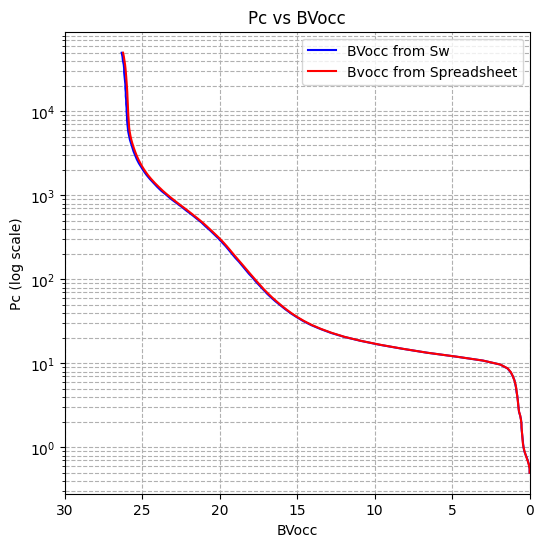

In [31]:
BVocc = (1-Sw)*BVinf             # Our BVocc from Sw
dbvocc = np.diff(BVocc)          # diff of BVocc for distribution, but loose one element in the array
dbvocc = np.insert(dbvocc,0,0)   # Our final dbvocc after adding a zero at the end.
print(len(dbvocc))

x_values = np.flipud((2*367)/(Pc*69035)*10**4)

###print(np.cumsum(dbvocc))

# Plot the log-normal distribution
plt.figure(figsize=(6, 6))
plt.plot(BVocc,Pc, 'b-', label='BVocc from Sw')
plt.plot(Bvocc, Pc, 'r-', label='Bvocc from Spreadsheet')
#plt.plot(x_values, log_normal_total_distribution, 'k-', label='Log-Normal Distribution')

# Set the x-axis to a logarithmic scale (base 10)
plt.yscale('log')
plt.xlim(30,0)
plt.title('Pc vs BVocc')
plt.ylabel('Pc (log scale)')
plt.xlabel('BVocc')
plt.grid(True, which="both", ls="--")
plt.legend()
plt.show()



# Inspect the workflow of BVol Gaussian where we use flipud data to view arrays from low to high pore throat radius.

## Input Gaussian Parameters:

In [32]:
w1       =  0.7
mu1      = np.log(10)
mu2      = np.log(1)
sigma1   = 1
sigma2   = 1

## x_values are from 212 to 0.5, so x_values were flipped so now between 0.5 and 212#

In [33]:
#BV2 = np.max(BVocc)/scale - BV1
w2 = 1- w1

# Generate x-values on a log scale (must be positive)
#x_values = np.logspace(-2, 3, 100)
x_values = np.flipud((2*367)/(Pc*69035)*10**4)

print('x_values',x_values)                # High to low from any Pc values
print('len(x_values)',len(x_values) )

x_values [2.12645759e-03 2.36944408e-03 2.64019589e-03 2.94188603e-03
 3.27804949e-03 3.65262648e-03 4.07000431e-03 4.53507678e-03
 5.05329195e-03 5.63072111e-03 6.27413175e-03 6.99106741e-03
 7.78992391e-03 8.68006356e-03 9.67191515e-03 1.07771108e-02
 1.20085928e-02 1.33807806e-02 1.49097864e-02 1.66134951e-02
 1.85118943e-02 2.06271956e-02 2.29842581e-02 2.56105907e-02
 2.85370794e-02 3.17979722e-02 3.54313934e-02 3.94801768e-02
 4.39914269e-02 4.90181783e-02 5.46195076e-02 6.08606115e-02
 6.78153114e-02 7.55643934e-02 8.41988024e-02 9.38203763e-02
 1.04540465e-01 1.16486310e-01 1.29796594e-01 1.44629431e-01
 1.61156316e-01 1.79569126e-01 2.00088223e-01 2.22955208e-01
 2.48429552e-01 2.76817620e-01 3.08450478e-01 3.43697688e-01
 3.82966105e-01 4.26725316e-01 4.75483564e-01 5.29813034e-01
 5.90354690e-01 6.57816493e-01 7.33008478e-01 8.16737438e-01
 9.10064878e-01 1.01404749e+00 1.12989245e+00 1.25900390e+00
 1.40286159e+00 1.56334186e+00 1.74185583e+00 1.94090689e+00
 2.16279251e+00

## PDF is a lognormal distribution function based on Gaussian parameters:

In [34]:
'''
  PDF is a distribution
'''
# Calculate the PDF for log-normal distribution 1
pdf1 = w1 * (1 / (sigma1 * np.sqrt(2 * np.pi))) * \
       np.exp(- (np.log(x_values) - mu1)**2 / (2 * sigma1**2))

# Calculate the PDF for log-normal distribution 2
pdf2 = w2 * (1 / (sigma2 * np.sqrt(2 * np.pi))) * \
       np.exp(- (np.log(x_values) - mu2)**2 / (2 * sigma2**2))


# Combine PDFs
combined_pdf = (pdf1 + pdf2)
print('combined_pdf',combined_pdf)

combined_pdf [7.18074323e-10 1.38921405e-09 2.65634477e-09 5.02013729e-09
 9.37696696e-09 1.73111351e-08 3.15866591e-08 5.69637546e-08
 1.01533460e-07 1.78868960e-07 3.11441576e-07 5.35963550e-07
 9.11610091e-07 1.53249370e-06 2.54626518e-06 4.18143987e-06
 6.78677669e-06 1.08871784e-05 1.72617940e-05 2.70502305e-05
 4.18960698e-05 6.41342158e-05 9.70345668e-05 1.45102603e-04
 2.14458750e-04 3.13277540e-04 4.52301943e-04 6.45434718e-04
 9.10308195e-04 1.26894966e-03 1.74833611e-03 2.38078829e-03
 3.20440671e-03 4.26278887e-03 5.60487260e-03 7.28407929e-03
 9.35640890e-03 1.18793192e-02 1.49079139e-02 1.84930417e-02
 2.26757498e-02 2.74843876e-02 3.29322498e-02 3.90113390e-02
 4.56877157e-02 5.29065327e-02 6.05848683e-02 6.86158970e-02
 7.68713143e-02 8.52112291e-02 9.34854804e-02 1.01546970e-01
 1.09261228e-01 1.16515890e-01 1.23233644e-01 1.29371833e-01
 1.34948428e-01 1.40023787e-01 1.44711418e-01 1.49172469e-01
 1.53601316e-01 1.58222100e-01 1.63246653e-01 1.68899253e-01
 1.75359436

## Cum Sum of the combined_pdf distribution to create BV_new. Check the max value of this pdf:

In [35]:
BV_new = np.cumsum(np.flipud(combined_pdf))

print(('len ot BV_new',len(BV_new), 'BV_new',BV_new))
print()
print(('len of BVocc', len(BVocc), 'BVocc',BVocc))


('len ot BV_new', 107, 'BV_new', array([2.61016553e-03, 6.27744636e-03, 1.14287218e-02, 1.85989641e-02,
       2.84328563e-02, 4.16780145e-02, 5.91700732e-02, 8.09188629e-02,
       1.08682305e-01, 1.43423237e-01, 1.86628621e-01, 2.39800903e-01,
       3.03810604e-01, 3.80550382e-01, 4.71736942e-01, 5.78247949e-01,
       7.01205946e-01, 8.41845055e-01, 1.00039910e+00, 1.17751089e+00,
       1.37313872e+00, 1.58659112e+00, 1.81687396e+00, 2.06238833e+00,
       2.32140887e+00, 2.59165058e+00, 2.87064411e+00, 3.15554017e+00,
       3.44353656e+00, 3.73180723e+00, 4.01765239e+00, 4.29862677e+00,
       4.57257704e+00, 4.83773594e+00, 5.09283612e+00, 5.33704531e+00,
       5.56992760e+00, 5.79155149e+00, 6.00228021e+00, 6.20276476e+00,
       6.39389085e+00, 6.57663970e+00, 6.75199913e+00, 6.92089839e+00,
       7.08414504e+00, 7.24236714e+00, 7.39596846e+00, 7.54514092e+00,
       7.68985234e+00, 7.82987613e+00, 7.96482456e+00, 8.09419639e+00,
       8.21743003e+00, 8.33394592e+00, 8.443

### The Max of BVocc is porosity or 26.15 in this instance. The max of test is around 9.

How do we rescale BVocc to be at the same scale as BVocc

The multiplier is:

    mul = Max of BVocc / Max of test


In [36]:
print(np.max(BV_new))
print(np.max(BVocc))

mul = np.max(BVocc)/np.max(BV_new)

print('mul',mul)

# Calculate w1 from Thomeer parameters
BV1 = 20.3
BV2 = 6.4
BVTOTAL = BV1 + BV2
w1_thomeer = (BVTOTAL - BV2)/BVTOTAL
print('w1:',w1, 'initial guess')

9.233568150103123
26.3208
mul 2.8505556651689457
w1: 0.7 initial guess


---
---
# **Final Code using mul in both pdfs**

## mul of around 2.83 will be used to scale the PDF to the actual BVocc from the spreadsheet.

How could we rescale PDF another way that provides an explaination of this rescale.

## Also w1 initial comes Thomeer parameters:

    BV1 = 20.3
    
    BV2 = 6.4
    
    BVTOTAL = BV1 + BV2
    
    w1_thomeer = (BVTOTAL - BV2)/BVTOTAL


![image.png](attachment:19d838b9-27f6-40cd-bd5d-f33e756cb984.png)

We can fine tune our analysis using the slide bars as shown above. This allows us to gain a sensitivity for the Gaussian parameters.

- We wanted out PDF functions to somewhat overlie that actual Pore Throat Distribution obtained from Thomeer spreadsheet, and it does
- Out goal is to have our new Bulk Volume Occupied (BV_new) shown as a red curve in the plot to the right lay over the our calculated BVocc from the Pc as Sw data
- This works rather well, but we do have a pronounced tail in the data for the early Pc values???
- Our final method will use optimization for an automatic analysis
- We could also use an interactive PDF plot where we select the mu1 and mu2 (in microns) from the Pore Throat Distribution data: x_values and our calculated dbvocc

Row
    [0] Column
        [0] FloatSlider(name='w1', step=0.01, value=0.7602996254681649)
        [1] FloatSlider(end=6, name='mu1', start=-3, value=1.791759469228055)
        [2] FloatSlider(end=6, name='mu2', start=-3, value=-2.3025850929940455)
        [3] FloatSlider(end=4, name='sigma1', start=0.1, value=0.9)
        [4] FloatSlider(end=4, name='sigma2', start=0.1, value=0.7)
    [1] ParamFunction(function, _pane=Matplotlib, defer_load=False)
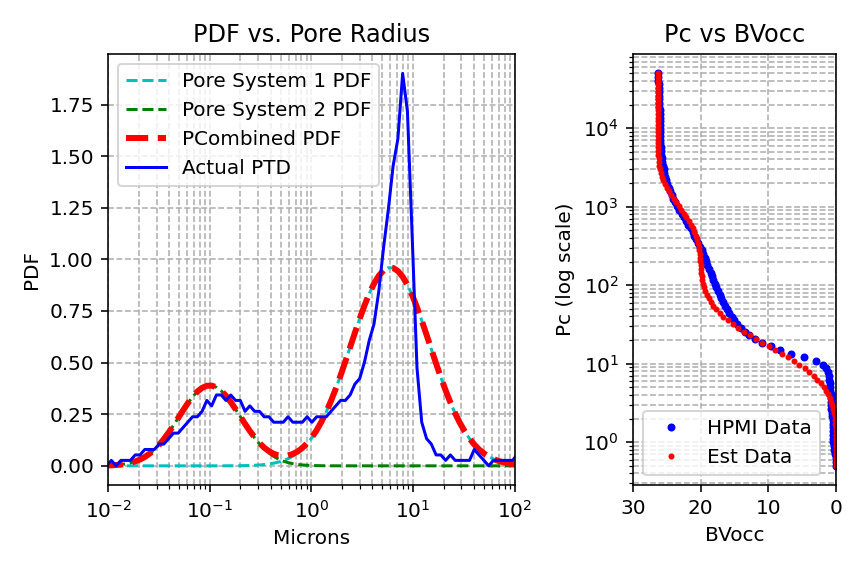

In [37]:
# No **flipud** in this code:
# Model function

def model_function(w1, mu1, mu2, sigma1, sigma2):

    #BV2 = np.max(BVocc)/scale - BV1
    w2 = 1- w1

    # Generate x-values for pore throat radii on a log scale from 212 to 0.5 microns
    x_values = ((2*367)/(Pc*69035)*10**4)


    '''
      PDF
    '''
    # Calculate the PDF for log-normal distribution
    pdf1 = mul * w1 * (1 / (sigma1 * np.sqrt(2 * np.pi))) * np.exp(- (np.log(x_values) - mu1)**2 / (2 * sigma1**2))
    pdf2 = mul * w2 * (1 / (sigma2 * np.sqrt(2 * np.pi))) * np.exp(- (np.log(x_values) - mu2)**2 / (2 * sigma2**2))


    # Combine PDFs distribution
    combined_pdf = (pdf1 + pdf2)

    # Sum up this distribution for a Pc curve
    BV_new = np.cumsum((combined_pdf))

    '''
      Plots
    '''
    # Create the plot
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(6, 4), gridspec_kw={'width_ratios': [2, 1]})

   # Plot PDF with reversed axes
    ax1.plot(x_values, pdf1,         'c--', label='Pore System 1 PDF')
    ax1.plot(x_values, pdf2,         'g--', label='Pore System 2 PDF')
    ax1.plot(x_values, combined_pdf, 'r--', label='PCombined PDF',lw=3)
    ax1.plot((x_values), dbvocc,      'b-', label='Actual PTD')
    #ax1.plot(Radii, dbvocc,          'k--', label='Our PTD',lw=1)
    ax1.set_yscale('linear')
    ax1.set_xscale('log')
    ax1.set_xlim(.01,100)
    ax1.set_xlabel('Microns')
    ax1.set_ylabel('PDF')
    ax1.set_title('PDF vs. Pore Radius')
    ax1.grid(True, which="both", ls="--")
    ax1.legend()


    # Plot the actual data with markers only
    ax2.semilogy(BVocc,  Pc, 'bo', markersize=3, label='HPMI Data')  # 'bo' specifies blue circle markers
    ax2.semilogy(BV_new, Pc, 'ro', markersize=2, label='Est Data')   # 'bo' specifies blue circle markers
    ax2.set_yscale('log')
    ax2.set_xlim(30,0)
    ax2.set_title('Pc vs BVocc')
    ax2.set_ylabel('Pc (log scale)')
    ax2.set_xlabel('BVocc')
    ax2.grid(True, which="both", ls="--")
    ax2.legend()

    plt.tight_layout()
    plt.close(fig)
    return fig



# Setup Panel widgets for interactive input
##########Scale_slider = pn.widgets.FloatSlider(name='Scale Slider', start=0.01, end=10, step=0.01, value=2.6)
w1_slider     = pn.widgets.FloatSlider(name='w1',     start=0.0, end=1, step=0.01, value=w1_thomeer)
mu1_slider    = pn.widgets.FloatSlider(name='mu1',    start=-3,  end=6, step=0.1,  value=np.log(6))
mu2_slider    = pn.widgets.FloatSlider(name='mu2',    start=-3,  end=6, step=0.1,  value=np.log(0.1))
sigma1_slider = pn.widgets.FloatSlider(name='sigma1', start=0.1, end=4, step=0.1,  value=0.9)
sigma2_slider = pn.widgets.FloatSlider(name='sigma2', start=0.1, end=4, step=0.1,  value=0.7)

# Create interactive plot
@pn.depends(w1=w1_slider, mu1=mu1_slider, mu2=mu2_slider, sigma1=sigma1_slider, sigma2=sigma2_slider)

def interactive_plot(w1, mu1, mu2, sigma1, sigma2):
    return model_function( w1, mu1, mu2, sigma1, sigma2)

# Display widgets and interactive plot
pn.Row( pn.Column( w1_slider, mu1_slider, mu2_slider, sigma1_slider, sigma2_slider),
    interactive_plot
).servable()



In [38]:
print('Theoretical w1?', round(19/26,2))

#print('Scale:',     round( Scale_slider.value,2))
print('w1:',         round( w1_slider.value,2))
print('mu1:',        round( np.exp(mu1_slider.value),2))
print('mu2:',        round( np.exp(mu2_slider.value), 2))
print('log_sigma1:', round( sigma1_slider.value,2) )
print('log_sigma2:', round(sigma2_slider.value, 2))

Theoretical w1? 0.73
w1: 0.76
mu1: 6.0
mu2: 0.1
log_sigma1: 0.9
log_sigma2: 0.7
